# Portfolio

# Import Libraries

Installieren und importieren Sie bitte folgende Bibliotheken für dieses Jupyter Notebook

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium.plugins import HeatMap
from shapely.geometry import Point, Polygon
from IPython.display import display, HTML
import os
import datetime as dt
import matplotlib.dates as mdates
import ipywidgets as widgets
from IPython.display import display, HTML

# CSV-Datei einlesen

1. Den Datensatz 'Electric Vehicle Charging in Germany' findet man als CSV-Datei 'charging_data.csv' unter folgenden Link auf Kaggle.
https://www.kaggle.com/datasets/mexwell/electric-vehicle-charging-in-germany

2. Die CSV-Datei herunterladen und an einem beliebigen Speicherort speichern.

3. Mit folgender Funktion ins Jupyter Notebook einlesen.

In [79]:
ds = pd.read_csv("C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv")

# Data Understanding

Zeigt die ersten 5 Zeilen des Datensatzes

In [80]:
ds.head()

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
0,0,GGEW AG,Normalladeeinrichtung,1,4.6,AC Steckdose Typ 2,NaN,NaN,NaN,4.6,...,NaN,Landkreis Bergstraße,Lorsch,64653,Klosterstr.,23,NaN,2017-01-02,49.653064,8.572109
1,1,Pfalzwerke AG,Schnellladeeinrichtung,2,75.0,AC Steckdose Typ 2,DC Kupplung Combo,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Lorsch,64653,Nibelungenstraße,135-137,NaN,2021-04-27,49.652969,8.554764
2,2,ENTEGA Energie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Krumbacher Str.,39,NaN,2017-11-21,49.658037,8.787881
3,3,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Erbacher Str.,102,a,2022-04-08,49.663670,8.796830
4,4,Entega Plus GmbH,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Landkreis Bergstraße,Fürth,64658,Schulstr.,12,NaN,2022-04-08,49.646360,8.781410


Zeigt die letzten 5 Zeilen des Datensatzes

In [81]:
ds.tail()

,Unnamed: 0,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,...,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,breitengrad,laengengrad
36765,36765,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,108,NaN,2016-06-01,51.301227,12.384566
36766,36766,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Scheffelstraße,35,NaN,2016-06-01,51.311695,12.372912
36767,36767,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Bornaische Straße,55,NaN,2018-07-05,51.305046,12.382487
36768,36768,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,30.0,AC Steckdose Typ 2,AC Steckdose Typ 2,NaN,NaN,22.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Richard Lehmann Straße,120,NaN,2019-08-12,51.314325,12.397213
36769,36769,Stadtwerke Leipzig GmbH,Normalladeeinrichtung,2,22.0,AC Kupplung Typ 2,AC Kupplung Typ 2,NaN,NaN,11.0,...,NaN,Kreisfreie Stadt Leipzig,Leipzig,4277,Eichendorffstraße,11,"Parkplatz Fitnessstudio, Zuganskarte notwendig",2022-04-13,51.314364,12.374747


Der Datensatz hat 22 Spalten und 36770 Zeilen.

In [82]:
ds.shape

(36770, 22)

Zeigt den Datentyp und wie veile Werte nicht 0 sind jeder Spalte an.

In [85]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36770 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              36770 non-null  int64  
 1   betreiber               36770 non-null  object 
 2   art_der_ladeeinrichung  36770 non-null  object 
 3   anzahl_ladepunkte       36770 non-null  int64  
 4   anschlussleistung       36770 non-null  float64
 5   steckertypen1           36770 non-null  object 
 6   steckertypen2           31111 non-null  object 
 7   steckertypen3           2233 non-null   object 
 8   steckertypen4           1132 non-null   object 
 9   p1_kw                   36770 non-null  float64
 10  p2_kw                   31129 non-null  float64
 11  p3_kw                   2233 non-null   float64
 12  p4_kw                   1131 non-null   float64
 13  kreis_kreisfreie_stadt  36770 non-null  object 
 14  ort                     36770 non-null

In [86]:
ds.describe()

,Unnamed: 0,anzahl_ladepunkte,anschlussleistung,p1_kw,p2_kw,p3_kw,p4_kw,postleitzahl,breitengrad,laengengrad
count,36770.000000,36770.000000,36770.000000,36770.000000,31129.000000,2233.000000,1131.000000,36770.000000,36770.000000,36770.000000
mean,18384.500000,1.938075,53.879393,37.648928,38.365378,32.406879,26.196729,54564.223117,50.562816,9.751840
std,10614.729036,0.550034,64.178987,58.958237,58.080733,40.314259,39.295098,27390.091752,1.828351,2.026769
min,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.300000,1062.000000,47.284400,5.243745
25%,9192.250000,2.000000,22.000000,22.000000,22.000000,22.000000,22.000000,31137.000000,48.833821,8.249386
50%,18384.500000,2.000000,44.000000,22.000000,22.000000,22.000000,22.000000,56357.000000,50.661428,9.470774
75%,27576.750000,2.000000,44.000000,22.000000,22.000000,22.000000,22.000000,79117.000000,51.992060,11.462498
max,36769.000000,4.000000,1200.000000,360.000000,360.000000,360.000000,360.000000,99991.000000,55.019600,15.543810


# Data Cleaning

Zeigt die Nullwerte für jede Spalte, anhand einer Heatmap, an.

<Axes: >

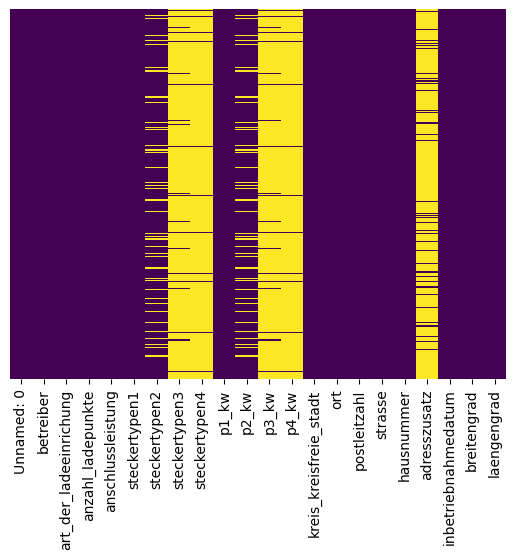

In [87]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Entfernen der unnötigen Spalten.

In [88]:
#Drop Columns/Entfernen der unnötigen Spalten
ds = ds.drop(columns=['Unnamed: 0', 'steckertypen1', 'steckertypen2', 'steckertypen3', 'steckertypen4', 'p1_kw', 'p2_kw', 'p3_kw', 'p4_kw', 'adresszusatz'])

<Axes: >

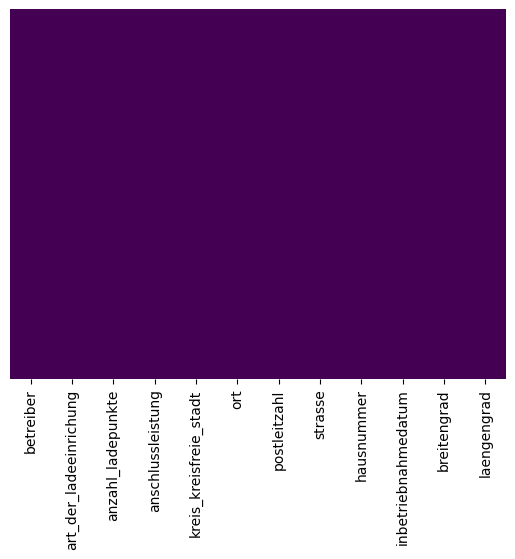

In [89]:
sns.heatmap(ds.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Data Analyse

## Wachstum in Deutschland über die Jahre

Die Spalte ‘inbetriebnahmedatum‘ von ihrem ursprünglichen Datentyp in ein Pandas-Datetime-Objekt konvertiert. 

Hierfür gruppierten wir zunächst unseren Datensatz (ds) mithilfe der Funktion groupby(‘year‘)‘, die die Daten nach dem Jahr gruppiert und die Funktion ‘size()‘, die die Anzahl der Einträge in jeder Gruppe zurückgibt.

Mit ‘reset_index(name=‘count‘)‘ werden die gruppierten Daten in einen DataFrame umgewandelt unter der Verwendung von den Spalten ‘year‘ und ‘count‘. 

Mit ‘px.bar‘ wird dann ein Balkendiagramm erstellt. 

Die X-Achse zeigt die Jahre und die Y-Achse die Anzahl der E-Ladestationen an. 

Durch ‘fig.show()‘ wird das Balkendiagramm ausgegeben.  


In [90]:
# datetime
ds['inbetriebnahmedatum'] = pd.to_datetime(ds['inbetriebnahmedatum'])

In [91]:
ds['year'] = ds['inbetriebnahmedatum'].dt.year
ds['month'] = ds['inbetriebnahmedatum'].dt.month

In [92]:
# Wie viele E- Ladesationen wurden im Jahr gebaut?
year_group =pd.DataFrame(ds.groupby('year').size().reset_index(name='count'))

In [93]:
fig = px.bar(year_group,
            x='year',
            y='count',
            title='Wachstum an E-Ladestationen über die Jahre in Deutschland',
            color='count',
            labels = {'count':'Anzahl'},
            height = 700)
fig.update_layout(xaxis_title='Jahre', yaxis_title='Anzahl der Ladesäulen')
fig.show()

### Schwankungen über die Jahreszeiten

In [112]:
# Konvertieren der Spalte 'inbetriebnahmedatum' in das Datetime-Format
ds_clean['inbetriebnahmedatum'] = pd.to_datetime(ds_clean['inbetriebnahmedatum'], errors='coerce')

# Erstellen einer neuen Spalte mit dem Jahr
ds_clean['jahr'] = ds_clean['inbetriebnahmedatum'].dt.year

# Erstellen einer neuen Spalte mit dem Monat
ds_clean['monat'] = ds_clean['inbetriebnahmedatum'].dt.month

# Erstellen einer neuen Spalte mit der Kalenderwoche
ds_clean['kalenderwoche'] = ds_clean['inbetriebnahmedatum'].dt.isocalendar().week

In [113]:
# Filtere der Spalte jahr
ds_clean = ds_clean[ds_clean['jahr'] <= 2022]
ds_clean = ds_clean[ds_clean['jahr'] >= 2010]

# Sortiere den DataFrame nach 'inbetriebnahmedatum'
ds_clean = ds_clean.sort_values(by='inbetriebnahmedatum')

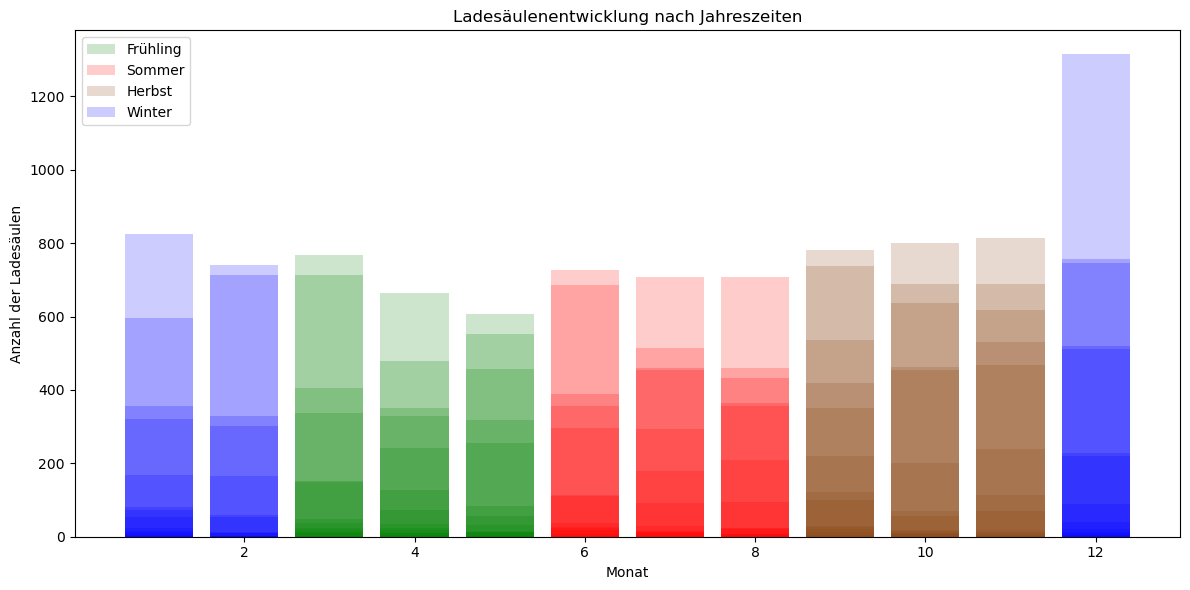

In [114]:
# Alle relevanten Daten in data laden
data = {
    'inbetriebnahmedatum': ds_clean['inbetriebnahmedatum'],
    'monat': ds_clean['monat'],
    'jahr': ds_clean['jahr']
}

# jeweiligen Jahreszeiten eine Farbe zuordnen, grau als Default Wert
def get_color(jahreszeit):
    color_mapping = {'Frühling': 'green', 'Sommer': 'red', 'Herbst': 'saddlebrown', 'Winter': 'blue'}

    return color_mapping.get(jahreszeit, 'gray')

# Funktion um Jahreszeit zu bestimmen
# Definieren der Jahreszeiten
def jahreszeit_bestimmen(datum):
    fruehling_beginn = datetime.strptime("01-03", "%d-%m").replace(year=datum.year)
    fruehling_ende = datetime.strptime("31-05", "%d-%m").replace(year=datum.year)

    sommer_beginn = datetime.strptime("01-06", "%d-%m").replace(year=datum.year)
    sommer_ende = datetime.strptime("31-08", "%d-%m").replace(year=datum.year)

    herbst_beginn = datetime.strptime("01-09", "%d-%m").replace(year=datum.year)
    herbst_ende = datetime.strptime("30-11", "%d-%m").replace(year=datum.year)

    winter_beginn = datetime.strptime("01-12", "%d-%m").replace(year=datum.year)
    winter_ende = datetime.strptime("28-02", "%d-%m").replace(year=datum.year)
# Zuordnen der Jahreszeiten
    if fruehling_beginn <= datum <= fruehling_ende:
        return "Frühling"
    elif sommer_beginn <= datum <= sommer_ende:
        return "Sommer"
    elif herbst_beginn <= datum <= herbst_ende:
        return "Herbst"
    else:
        return "Winter"


# Jahreszeit_bestimmen auf die Spalte "inbetriebnahmedatum"
ds_clean['Jahreszeit'] = ds_clean['inbetriebnahmedatum'].apply(jahreszeit_bestimmen)

# Datenexploration der Splate Jahreszeit
ds_clean_expanded = ds_clean.explode('Jahreszeit')

# Gruppieren nach Jahr, Monat und Jahreszeit und berechnen der Summe der Anzahl der Ladesäulen
grouped_data = ds_clean_expanded.groupby(['jahr', 'monat', 'Jahreszeit']).size().reset_index(name='Anzahl')

# Sortieren der Jahreszeiten
sorted_seasons = ['Frühling', 'Sommer', 'Herbst', 'Winter']
grouped_data['Jahreszeit'] = pd.Categorical(grouped_data['Jahreszeit'], categories=sorted_seasons, ordered=True)
grouped_data = grouped_data.sort_values(by=['Jahreszeit'])

# Erstellen des Balkendiagrammes
plt.figure(figsize=(12, 6))

for jahreszeit in sorted_seasons:
 # Erstelle eine Teilmenge (subset) des DataFrames für die aktuelle Jahreszeit
    subset = grouped_data[grouped_data['Jahreszeit'] == jahreszeit]
 # Erstelle ein Balkendiagramm für die Anzahl der Ladesäulen nach Monat und aktueller Jahreszeit
    plt.bar(subset['monat'], subset['Anzahl'], color=get_color(jahreszeit), label=jahreszeit, alpha= 0.2)

#Beschriftung des Diagrammes
plt.xlabel('Monat')
plt.ylabel('Anzahl der Ladesäulen')
plt.title('Ladesäulenentwicklung nach Jahreszeiten')
plt.legend()
plt.tight_layout()
plt.show()
     

## Stadtkreise vs. Landkreise

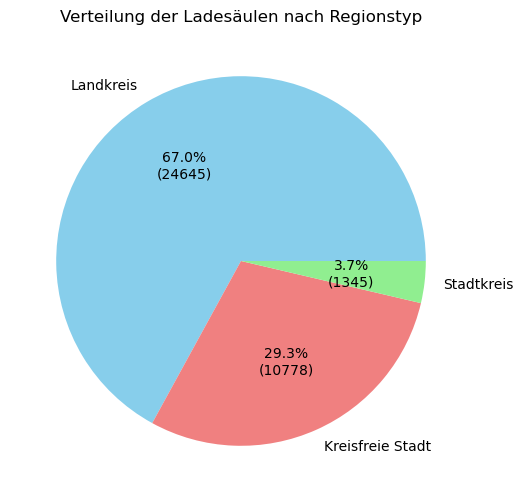

In [122]:
# CSV-Datensatz einlesen
ladesaeulen_ds = pd.read_csv('C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv')

# Extrahiere die Information aus der Spalte "kreis_kreisfreie_stadt"
ladesaeulen_ds['Regionstyp'] = ladesaeulen_ds['kreis_kreisfreie_stadt'].apply(lambda x: x.split()[0])

# Umschreiben bei der Ausgabe für bessere Übersicht
ladesaeulen_ds['Regionstyp'] = ladesaeulen_ds['Regionstyp'].replace('Kreisfreie', 'Kreisfreie Stadt')

# Verbinde die Zählungen von "Landkreis" und "Kreis"
gesamt_count = ladesaeulen_ds['Regionstyp'].replace({'Kreis': 'Landkreis'}).value_counts()

# Diagramm erstellen (Kreisdiagramm)
plt.figure(figsize=(10, 6))

# Farben für die Segmente
colors = ['skyblue', 'lightcoral', 'lightgreen']

# Funktion, um absolute Anzahl in Klammern unterhalb der Prozentzahl anzuzeigen
def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f'{pct:.1f}%\n({absolute})'

# Kreisdiagramm erstellen
gesamt_count.plot(kind='pie', autopct=lambda pct: func(pct, gesamt_count), colors=colors)

# Diagramm-Titel und Achsenbeschriftungen
plt.title('Verteilung der Ladesäulen nach Regionstyp')
plt.ylabel('')  # Entfernt die standardmäßige Beschriftung der y-Achse

# Diagramm anzeigen
plt.show()


# Heatmap Deutschland

In [120]:
# Mittelpunkt der Karte (Durchschnitt der Koordinaten)
map_center = [ds['breitengrad'].mean(), ds['laengengrad'].mean()]

# Erstelle eine Deutschlandkarte als Hintergrund
germany_map = folium.Map(location=map_center, zoom_start=6, tiles='http://a.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
            attr='&copy; <a href="https://www.openstreetmap.de/karte.html">OpenStreetMap Deutschland</a> contributors')

# Extrahiere die Koordinaten aus dem Datensatz
coordinates = ds[['breitengrad', 'laengengrad']].values

# Füge die Heatmap hinzu
HeatMap(coordinates,radius=15, blur=10, gradient={0.4: 'blue', 0.8: 'yellow', 1: 'red'}, min_opacity=0.4).add_to(germany_map)


# Speichere die Karte in einer Datei (zum Beispiel "heatmap_on_germany_map.html")
germany_map.save("heatmap_on_germany_map.html")

# Anzeigen der Karte im Jupyter Notebook
germany_map


# Prognose

# Vergleich

## EnBW mobility+ AG und CO KG vs. Konkurrenz

In [94]:
monthly_betreiber_data = ds.groupby(['year', 'month', 'betreiber']).size().sort_values(ascending=False) .reset_index(name='count')
monthly_betreiber_data['date'] = pd.to_datetime(dict(year = monthly_betreiber_data.year, month = monthly_betreiber_data.month, day=1))

In [99]:
betreiber_group = pd.DataFrame(ds['betreiber'].value_counts().reset_index().values, columns=['betreiber', 'count'])

In [100]:
konkurrenz_betreiber = betreiber_group['betreiber'].head(4).values

In [101]:
konkurrenz_betreiber

array(['E.ON Drive GmbH', 'EnBW mobility+ AG und Co.KG', 'EWE Go GmbH',
       'Mercedes-Benz AG'], dtype=object)

In [102]:
monthly_betreiber_data = monthly_betreiber_data[monthly_betreiber_data['betreiber'].isin(konkurrenz_betreiber)]
monthly_betreiber_data.sort_values(by='date', inplace = True) 

In [103]:
fig = px.line(monthly_betreiber_data, 
              x='date', 
              y="count", 
              title='Wachstum der Ladestationen je Betreiber (monatlich)', 
              color='betreiber',
              labels={'betreiber': 'Betreiber'},
              height= 700)
fig.update_layout(xaxis_title='Jahre', yaxis_title='Anzahl der Ladesäulen')
fig.show()

In [104]:
# Wie viel Ladestation hat ein Betreiber?
anzahl_betreiber = ds['betreiber'].value_counts().reset_index()
anzahl_betreiber.columns = ['betreiber', 'count']
ds['betreiber'].value_counts()

betreiber
E.ON Drive GmbH                                 2154
EnBW mobility+ AG und Co.KG                     2006
EWE Go GmbH                                      894
Mercedes-Benz AG                                 825
Westenergie Metering GmbH                        795
                                                ... 
Ambulanter Pflegedienst Angelika Müller e.K.       1
Kliniken Dr. Erler gGmbH                           1
Willi Kippes                                       1
Arvena Park Hotel                                  1
Ingenieurbüro                                      1
Name: count, Length: 4772, dtype: int64

In [105]:
top_ten_betreiber = ds['betreiber'].value_counts().head(10).reset_index(name='count')
top_ten_betreiber.columns = ['betreiber', 'count']

In [106]:
top_ten_betreiber

,betreiber,count
0,E.ON Drive GmbH,2154
1,EnBW mobility+ AG und Co.KG,2006
2,EWE Go GmbH,894
3,Mercedes-Benz AG,825
4,Westenergie Metering GmbH,795
5,Stromnetz Hamburg GmbH,701
6,SWM Versorgungs GmbH,598
7,Privatperson,569
8,ALDI SÜD,557
9,Allego GmbH,552


In [107]:
fig = px.bar(top_ten_betreiber,
            x = 'betreiber',
            y = 'count',
            title = 'Wie viele Ladesäulen haben die Top 10 Betreiber in Deutschland?',
            color = 'count',
            labels={'count': 'Anzahl'},
            height = 700)
fig.update_layout(xaxis_title='Betreiber', yaxis_title='Anzahl der Ladesäulen')
fig.show()

# E-Ladenetz in Baden-Württemberg

## Heatmap Baden-Württemberg

In [109]:
# CSV-Datensatz einlesen
ladesaeulen_ds = pd.read_csv('C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv')

# Beispiel Polygon-Koordinaten für die Grenzen von Baden-Württemberg
bw_polygon_coords = [
    [48.97, 8.22],
    [48.79, 8.04],
    [48.55, 7.80],
    [47.99, 7.59],
    [47.71, 7.51],
    [47.57, 7.62],
    [47.59, 7.89],
    [47.66, 8.91],
    [47.66, 8.91],
    [47.66, 9.90],
    [47.66, 10.11],
    [48.12, 10.12],
    [48.34, 10.01],
    [48.46, 10.06],
    [48.59, 10.30],
    [48.70, 10.27],
    [48.69, 10.50],
    [48.94, 10.43],
    [49.10, 10.21],
    [49.55, 10.07],
    [49.49, 9.94],
    [49.72, 9.79],
    [49.72, 9.78],
    [49.70, 9.63],
    [49.79, 9.65],
    [49.74, 9.31],
    [49.65, 9.41],
    [49.58, 9.11],
    [49.49, 8.95],
    [49.52, 8.75],
    [49.62, 8.69],
    [49.59, 8.42],
    [49.47, 8.46],
    [49.30, 8.48],
    [49.24, 8.39],
    [49.08, 8.35],
    [48.98, 8.25]
]

bw_polygon = Polygon(bw_polygon_coords)

# Filtern der Ladesäulenstandorte innerhalb von Baden-Württemberg
ladesaeulen_ds['Inside_BW'] = ladesaeulen_ds.apply(lambda row: bw_polygon.contains(Point(row['breitengrad'], row['laengengrad'])), axis=1)
ladesaeulen_ds_bw = ladesaeulen_ds[ladesaeulen_ds['Inside_BW']]

# Karte erstellen
karte_heatmap_bw = folium.Map(location=[48.6616, 9.3501], zoom_start=10)

# Heatmap erstellen mit kleinerem Radius
heatmap_data_bw = [[row['breitengrad'], row['laengengrad']] for index, row in ladesaeulen_ds_bw.iterrows()]
HeatMap(heatmap_data_bw, radius=11).add_to(karte_heatmap_bw)

# HTML-Datei erstellen
karte_heatmap_bw_html = karte_heatmap_bw._repr_html_()

# Karte im Jupyter Notebook anzeigen
display(HTML(karte_heatmap_bw_html))

# Top 5 Land/Stadtkreise in Baden-Württemberg

In [110]:
# Datenrahmen aus der CSV-Datei laden
ladesaeulen_ds = pd.read_csv('C:\\Users\\Administrator\\OneDrive\\Dokumente\\Data Science Portfolio\\Data Science\\Analytics-Avengers\\charging_data.csv')

# Spaltenname für die Orte
orte_spalte = 'kreis_kreisfreie_stadt'

# Liste der gesuchten Orte bzw. alle Stadt/Landkreise in Baden-Württemberg
gesuchte_orte = ['Alb-Donau-Kreis', 'Biberach', 'Bodenseekreis', 'Böblingen', 'Breisgau-Hochschwarzwald',
                 'Calw', 'Emmendingen', 'Enzkreis', 'Esslingen', 'Freudenstadt', 'Göppingen',
                 'Heidenheim', 'Heilbronn', 'Hohenlohekreis', 'Karlsruhe', 'Konstanz', 'Lörrach',
                 'Ludwigsburg', 'Main-Tauber-Kreis', 'Mannheim', 'Neckar-Odenwald-Kreis', 'Ortenaukreis',
                 'Ostalbkreis', 'Pforzheim', 'Rastatt', 'Ravensburg', 'Rems-Murr-Kreis', 'Reutlingen',
                 'Rhein-Neckar-Kreis', 'Rottweil', 'Schwäbisch Hall', 'Schwarzwald-Baar-Kreis',
                 'Sigmaringen', 'Tübingen', 'Tuttlingen', 'Waldshut', 'Baden-Baden', 'Freiburg im Breisgau',
                 'Heidelberg', 'Heilbronn', 'Karlsruhe', 'Mannheim', 'Pforzheim', 'Stuttgart', 'Ulm']

# Datenrahmen nach den gesuchten Orten filtern
gefilterter_ds = ladesaeulen_ds[ladesaeulen_ds[orte_spalte].str.contains('|'.join(gesuchte_orte))]

# Anzahl der Ladesäulen pro Ort zählen
anzahl_ladesaeulen_pro_ort = gefilterter_ds.groupby(orte_spalte).size().reset_index(name='count')

# Top 5 Orte nach Ladesäulenanzahl auswählen
top5_orte = anzahl_ladesaeulen_pro_ort.sort_values(by='count', ascending=False).head(5)

# Ergebnisse anzeigen
print(top5_orte)

# Balkendiagramm mit Plotly Express erstellen
fig = px.bar(top5_orte,
             x='kreis_kreisfreie_stadt',
             y='count',
             title='Top 5 Stadt- und Landkreise in Baden-Württemberg',
             color='count',
             labels={'kreis_kreisfreie_stadt': 'Stadt- und Landkreise', 'count': 'Anzahl'},
             height=500)

fig.update_layout(xaxis_title='Stadt- und Landkreise', yaxis_title='Anzahl der Ladesäulen')
fig.show()


   kreis_kreisfreie_stadt  count
42   Stadtkreis Stuttgart    698
4     Landkreis Böblingen    530
8     Landkreis Esslingen    292
16  Landkreis Ludwigsburg    261
14    Landkreis Karlsruhe    223
